In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./car data.csv')

## Basic EDA

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## DATA CLEANING

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Observation: There are no null values

In [10]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [11]:
# Deleting Duplicated Rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)
df.shape

(299, 9)

## Observation : There was Duplicated vales in index 17 and 93 and we removed them

## Handling Outliers

<Axes: >

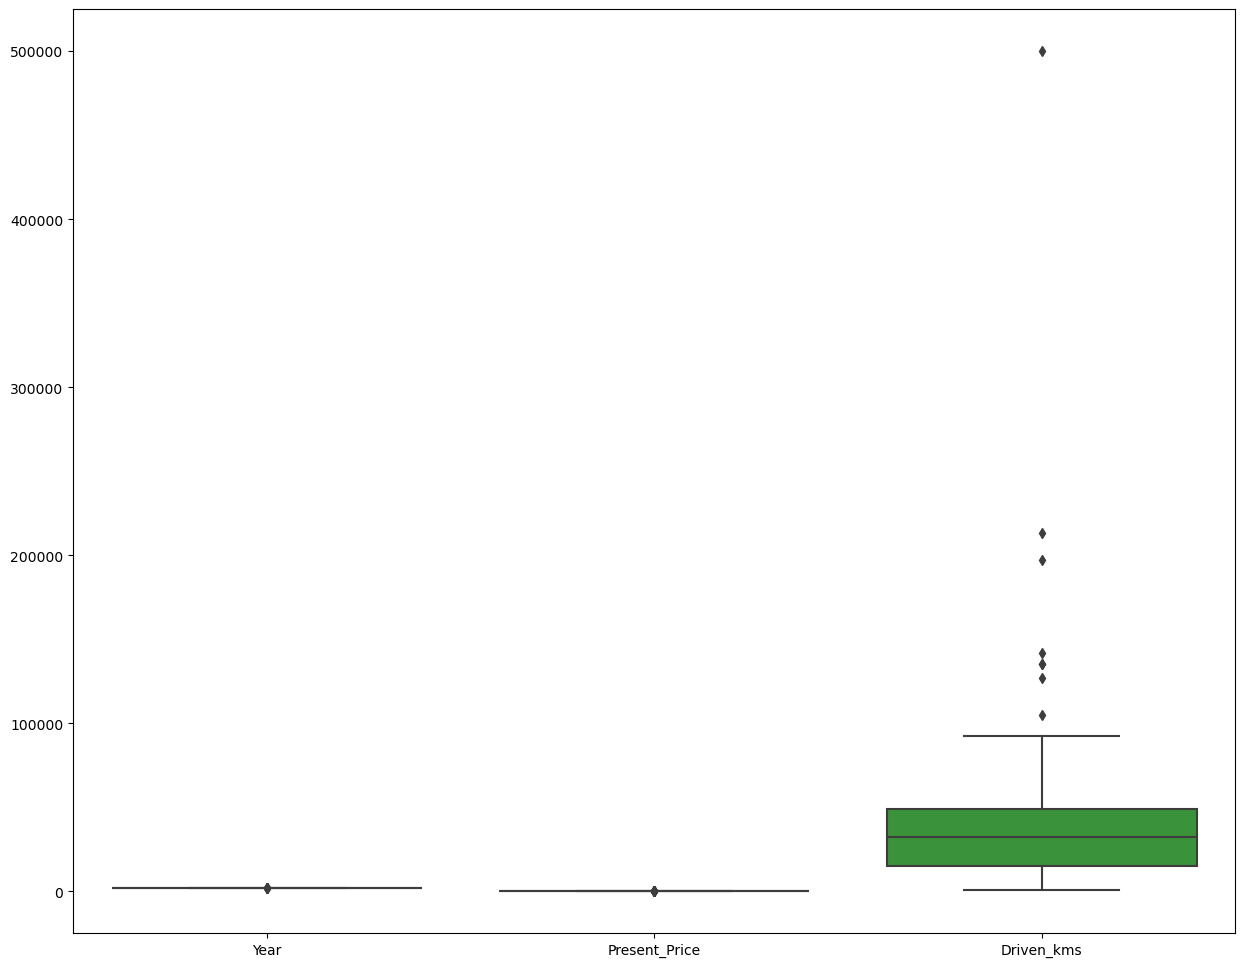

In [12]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df[['Year','Present_Price','Driven_kms']])

## Observation : There are Outliers in Driven_kms

In [13]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in ['Driven_kms']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in Driven_kms attribute: [127000, 104707, 135000, 135154, 197176, 142000, 213000, 500000]


In [14]:
# Remove Outlier
def handle_outliers(data):
    # Compute percentiles
    tenth_percentile = np.percentile(data.dropna(), 10)
    ninetieth_percentile = np.percentile(data.dropna(), 90)
    
    # Handle outliers by capping
    data = np.where(data < tenth_percentile, tenth_percentile, data)
    data = np.where(data > ninetieth_percentile, ninetieth_percentile, data)
    
    return data

# Assuming df is your DataFrame
for i in ['Driven_kms']:
    df[i] = handle_outliers(df[i])

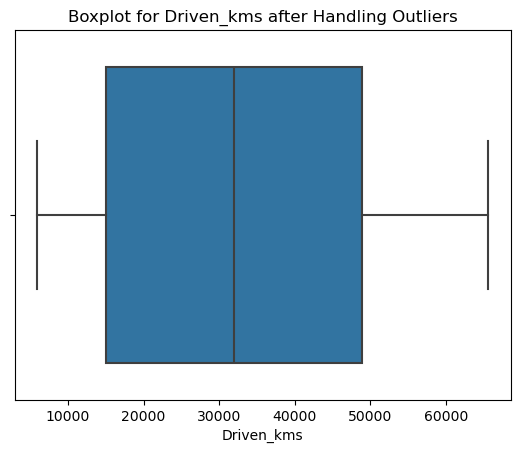

In [15]:
sns.boxplot(x=df['Driven_kms'])
plt.title('Boxplot for Driven_kms after Handling Outliers')
plt.show()

# Univarent Analysis

In [16]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

## Observation : There are cars with total 98 carnames

<Axes: xlabel='Car_Name', ylabel='count'>

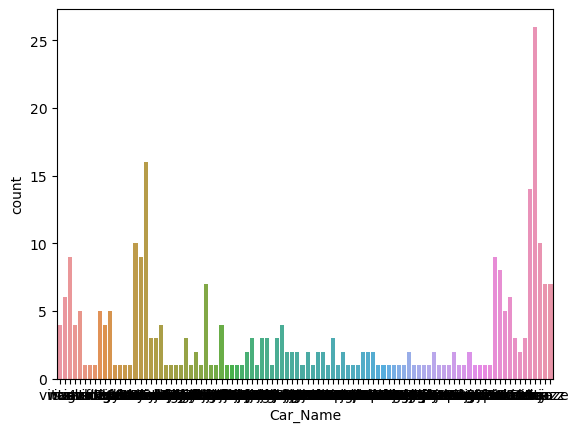

In [17]:
sns.countplot(x= df['Car_Name'])

<Axes: xlabel='Fuel_Type', ylabel='count'>

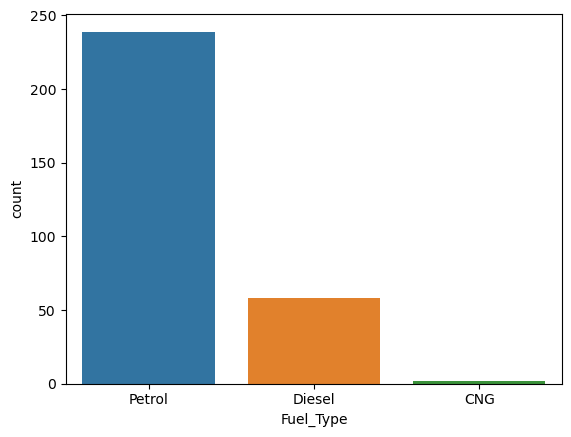

In [18]:
sns.countplot(x= df['Fuel_Type'])

<Axes: xlabel='Selling_type', ylabel='count'>

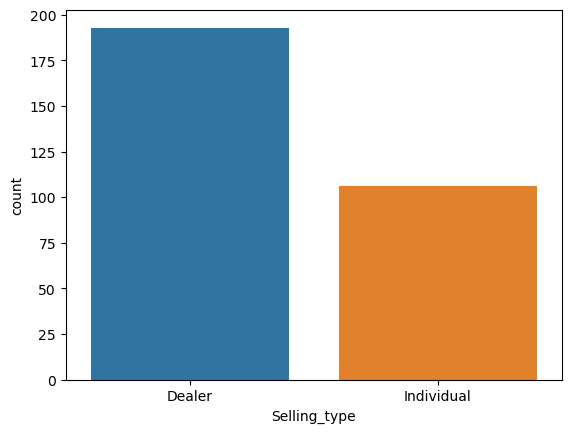

In [19]:
sns.countplot(x= df['Selling_type'])

<Axes: xlabel='Transmission', ylabel='count'>

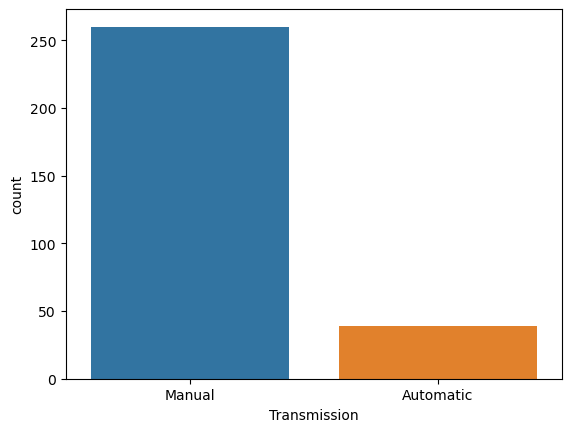

In [20]:
sns.countplot(x= df['Transmission'])

<Axes: xlabel='Owner', ylabel='count'>

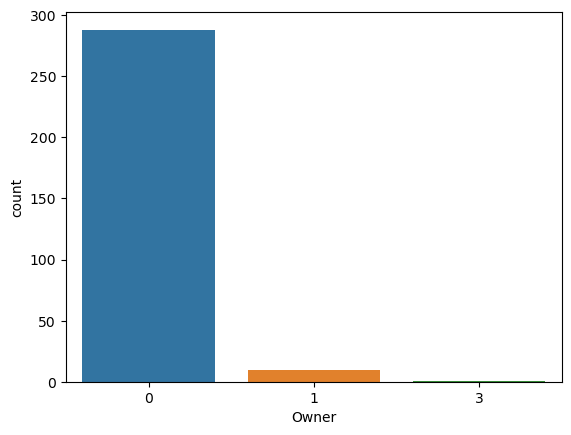

In [21]:
sns.countplot(x= df['Owner'])

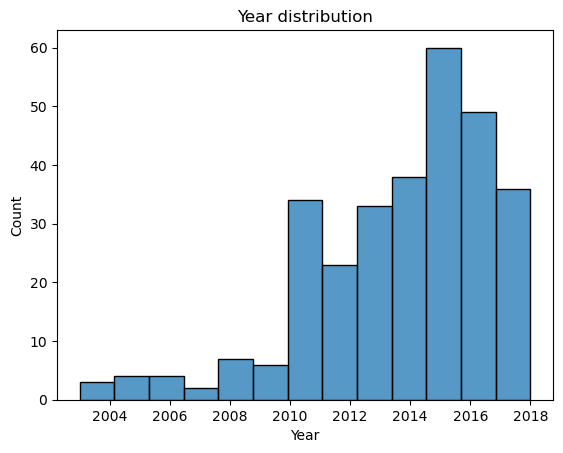

In [22]:
sns.histplot(df.Year)
plt.title('Year distribution')
plt.show()

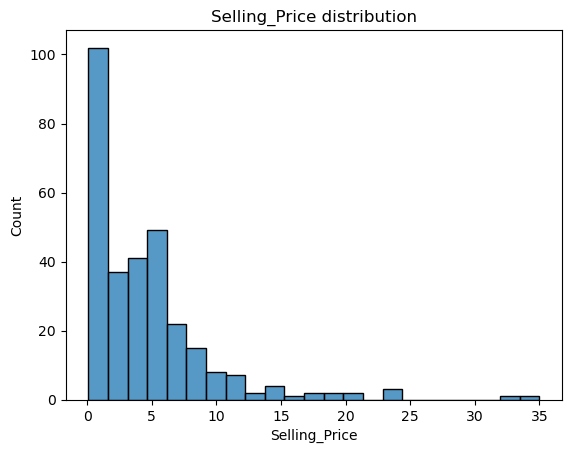

In [23]:
sns.histplot(df.Selling_Price)
plt.title('Selling_Price distribution')
plt.show()

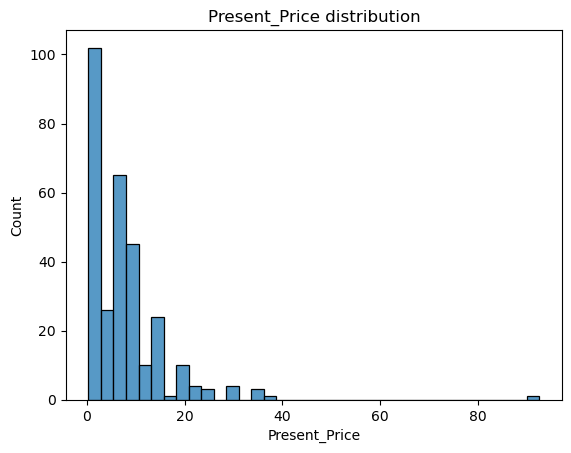

In [24]:
sns.histplot(df.Present_Price)
plt.title('Present_Price distribution')
plt.show()

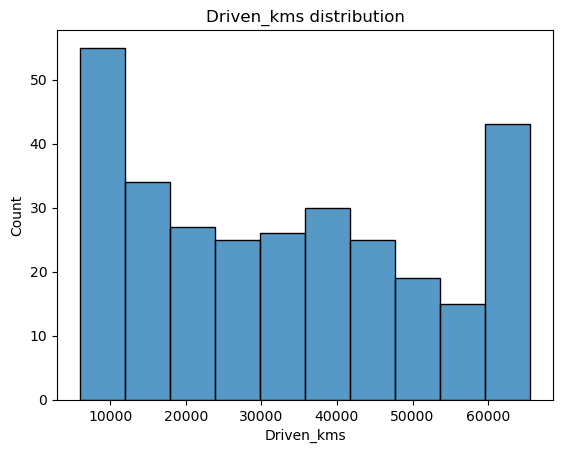

In [25]:
sns.histplot(df.Driven_kms)
plt.title('Driven_kms distribution')
plt.show()

# Bivarient Analysis

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

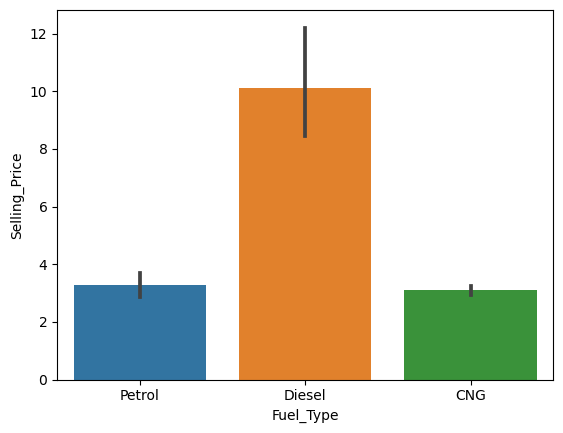

In [26]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df) 

<Axes: xlabel='Selling_type', ylabel='Selling_Price'>

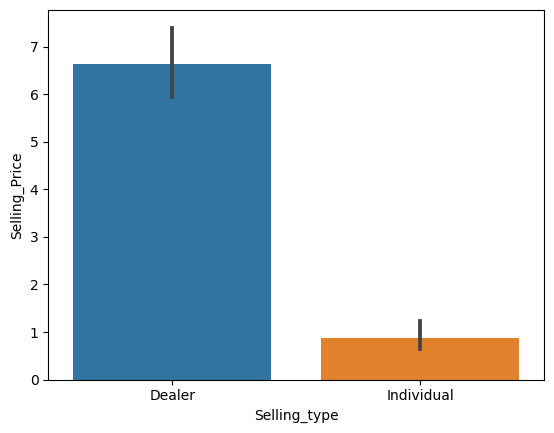

In [27]:
sns.barplot(x='Selling_type',y='Selling_Price',data=df)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

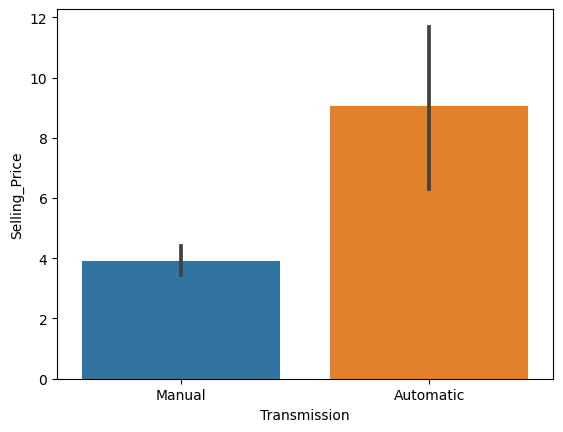

In [28]:
sns.barplot(x='Transmission',y='Selling_Price',data=df)

# Applyling Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Selling_type'] = LabelEncoder().fit_transform(df['Selling_type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])
df['Car_Name'] = LabelEncoder().fit_transform(df['Car_Name'])

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5940.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0


# Multivarient Analysis

In [1]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='bwr')
plt.title("Correlation Map")
plt.show()

NameError: name 'plt' is not defined

In [69]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Car_Name,1.000000,0.014713,0.501429,0.474651,0.289576,-0.368454,-0.829255,-0.055072,-0.080579
Year,0.014713,1.000000,0.234369,-0.053167,-0.610392,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.501429,0.234369,1.000000,0.876305,0.104854,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,0.474651,-0.053167,0.876305,1.000000,0.333034,-0.431887,-0.511779,-0.334326,0.009948
Driven_kms,0.289576,-0.610392,0.104854,0.333034,1.000000,-0.303327,-0.327667,-0.027433,0.058534
Fuel_Type,-0.368454,-0.046210,-0.500292,-0.431887,-0.303327,1.000000,0.347922,0.068618,0.054174
Selling_type,-0.829255,-0.036820,-0.553851,-0.511779,-0.327667,0.347922,1.000000,0.058669,0.123646
Transmission,-0.055072,0.003434,-0.348869,-0.334326,-0.027433,0.068618,0.058669,1.000000,-0.052166
Owner,-0.080579,-0.181639,-0.087880,0.009948,0.058534,0.054174,0.123646,-0.052166,1.000000


# Data Splitting For Simple Linear Regression

In [41]:
from sklearn.model_selection import train_test_split

In [47]:
X = df[['Present_Price']]
y = df['Selling_Price']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
model.coef_ , model.intercept_

(array([0.49395899]), 0.843809284177552)

In [52]:
model.predict(X_test)

array([ 5.88713059,  1.23897648,  4.20273043,  1.53535187,  7.56165157,
        2.7949473 ,  1.74281465,  5.70930535,  1.25873484,  4.78560204,
        5.7833992 ,  5.48702381,  1.36246623, 18.60657463,  7.0084175 ,
        7.49249731,  1.10066796,  1.10066796,  1.30813074,  5.23510472,
        1.19945976,  1.10066796,  7.56165157,  4.54356213,  7.61104747,
        2.7949473 ,  1.43656007,  3.65937554,  2.80976607,  4.99306481,
        3.65937554,  3.30866465,  6.67252539,  4.30152223,  7.56165157,
        5.24992349,  4.82511876,  3.03204762,  3.35806055,  3.65937554,
        1.21427853,  4.59789762,  4.37561608,  1.27355361,  1.33282869,
        6.27735819,  4.59789762,  5.7833992 ,  1.25873484,  7.56165157,
        1.21427853,  6.79107554,  4.65223311,  1.23255501,  3.03204762,
        4.19779084, 10.05120489,  1.00187616,  5.7340033 ,  3.03204762])

In [53]:
y_test

53      2.75
125     0.75
272     5.30
111     1.15
256     8.40
27      1.95
99      1.70
2       7.25
155     0.48
18      2.65
270     7.50
236     4.80
177     0.31
62     23.50
70      4.50
82     12.50
194     0.17
184     0.25
146     0.52
8       8.75
172     0.38
176     0.35
235    11.25
31      4.95
91      3.51
19      2.85
134     0.65
224     5.25
40      2.55
290     6.40
205     5.15
24      3.00
281     8.99
264     3.65
258     9.15
9       7.45
42      5.50
225     2.55
17      3.25
203     5.25
190     0.20
247     5.25
41      1.95
128     0.75
151     0.50
296     3.35
279     2.10
267     6.70
145     0.55
255     8.50
182     0.25
44      7.50
47      5.80
144     0.55
234     3.10
199     3.25
95     17.00
193     0.18
291     3.25
237     2.00
Name: Selling_Price, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
my_linear_preds_train = model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', model.score(X_train, y_train))

MAE on Train Data : 1.5100458677990447
MSE on Train Data : 6.224554010788539
RMSE on Train Data : 2.494905611599072
R-squared on Train Data : 0.7636663659791035


In [56]:
my_model_preds = model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', model.score(X_test, y_test))

MAE on Train Data : 1.462670048922205
MSE on Train Data : 3.9362745848958514
RMSE on Train Data : 1.9840046836879826
R-squared on Train Data : 0.7859538230030709


# Data Splitting For Multiple Linear Regression

In [60]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 8)
(75, 8)
(224,)
(75,)


In [62]:
my_multiple_linear_model = LinearRegression()

In [63]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [64]:
my_multiple_linear_model.coef_ , my_multiple_linear_model.intercept_

(array([-5.65612654e-03,  2.71129915e-01,  4.44773386e-01, -4.12458040e-05,
        -1.82355810e+00, -1.88293277e+00, -1.35415641e+00, -8.19150962e-01]),
 -537.8474093711089)

In [65]:
my_multiple_linear_model.predict(X_test)

array([ 3.26771565,  5.81314775,  2.28605787,  0.97009096,  5.99124517,
        1.36891497, -3.29633664,  0.88939743,  4.50753765,  8.26859304,
        4.42719855,  1.29546104, -0.57451073,  7.36364653,  8.2555819 ,
        3.8354565 , 14.73088523,  2.45707083,  1.92666487,  8.11384521,
       14.68126009, -2.52310031,  7.04504688, -0.4713916 ,  2.44656213,
        0.08542676,  0.44522094,  4.78248575,  0.62171336,  2.00989086,
        5.41040408,  0.78157224,  2.752081  ,  1.7245151 ,  0.60645742,
        0.79650301,  4.47131131,  6.55252686,  0.05748889,  0.3448797 ,
        4.2411209 ,  7.51025997,  9.95897085,  8.23565428,  8.23760613,
       -0.1131545 ,  1.29342455,  0.82988218, -3.35003734,  5.02585994,
        2.18921214,  1.94683332, -0.48030759,  4.04500856,  0.27691903,
        4.80664083,  2.31438713,  9.16161033,  7.90466965,  4.25613285,
        3.20305273,  3.23567208,  4.11859955,  6.36566823,  1.37065781,
        1.20963877, 19.21486039,  9.70483397,  2.28102077,  6.12

In [66]:
y_test

24      3.00
64      4.75
102     1.35
170     0.40
285     5.75
       ...  
106     1.20
80      4.75
210    11.25
196     0.15
271     2.25
Name: Selling_Price, Length: 75, dtype: float64

In [67]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.1608507062889235
MSE on Train Data : 3.000632169350918
RMSE on Train Data : 1.7322332895285548
R-squared on Train Data : 0.8881388084687911


In [68]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))

MAE on Train Data : 1.1619982976871055
MSE on Train Data : 2.747100856777062
RMSE on Train Data : 1.6574380401019706
R-squared on Train Data : 0.8449326783598621


In [70]:
# HyperParameter Tunning

In [72]:
x = df[['Car_Name','Year','Present_Price','Fuel_Type','Selling_type','Transmission']] # Features
y = df['Selling_Price'] # Target variable

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 6)
(75, 6)
(224,)
(75,)


In [75]:
my_multiple_linear_model = LinearRegression()
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [76]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.205106346078842
MSE on Train Data : 3.328521869376305
RMSE on Train Data : 1.8244237088396722
R-squared on Train Data : 0.8759153400576047


In [77]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Train Data : 1.171289910841695
MSE on Train Data : 2.6305937677867233
RMSE on Train Data : 1.621910530142376
R-squared on Train Data : 0.8515092269409785
